In [40]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r1-good.csv')
dfm = pd.read_csv('wat-r1-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
1,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
2,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,11,26,4,6,1
3,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,10,26,3,6,1
4,86,4,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,9,26,2,6,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,2,0,0xeddc0,0,0,3,2,8,1,1,23,7,3,1,31,32,7,7,0
1,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,29,32,6,7,0
2,79,0,2,0xeddc0,3,0,0,4,16,18,2,1,1,70,1,11,32,5,7,0
3,80,0,2,0xeddc0,3,1,1,4,16,18,2,1,1,70,1,10,32,4,7,0
4,81,0,2,0xeddc0,3,2,1,4,16,18,2,1,1,70,1,9,32,3,7,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
1,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
2,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,11,26,4,6,1
3,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,10,26,3,6,1
4,86,4,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,9,26,2,6,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
50112,7,2,0,0xeddc0,0,0,3,2,8,1,1,23,7,3,1,31,32,7,7,0
50113,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,29,32,6,7,0
0,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
50114,79,0,2,0xeddc0,3,0,0,4,16,18,2,1,1,70,1,11,32,5,7,0
50115,80,0,2,0xeddc0,3,1,1,4,16,18,2,1,1,70,1,10,32,4,7,0
50116,81,0,2,0xeddc0,3,2,1,4,16,18,2,1,1,70,1,9,32,3,7,0
50117,82,0,2,0xeddc0,3,3,1,4,16,18,2,1,1,70,1,8,32,2,7,0
1,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
2,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,11,26,4,6,1
3,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,10,26,3,6,1


In [12]:
df.to_csv('wat-r1-pkt.csv',index=False)

In [13]:
df = pd.read_csv("wat-r1-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,2,0,0xeddc0,0,0,3,2,8,1,1,23,7,3,1,31,32,7,7,0
1,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,29,32,6,7,0
2,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
3,79,0,2,0xeddc0,3,0,0,4,16,18,2,1,1,70,1,11,32,5,7,0
4,80,0,2,0xeddc0,3,1,1,4,16,18,2,1,1,70,1,10,32,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121948,3251376,2,4,0x1152c0,4,1,1,2,8,0,0,27,11,3251361,10026,22,26,5,6,1
121949,3251383,2,4,0x1152c0,4,2,1,2,8,0,0,27,11,3251361,10026,17,26,4,6,1
121950,3251390,2,4,0x1152c0,4,3,1,2,8,0,0,27,11,3251361,10026,11,26,3,6,1
121951,3251397,2,4,0x1152c0,4,4,2,2,8,0,0,27,11,3251361,10026,4,26,2,6,1


In [14]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,0.074014,0.159709,0.020008,0.011741,-0.018427,-0.051869,-0.066649,-0.087441,-0.114769,0.074026,0.073298,1.000000,0.824879,-0.051102,-0.122039,-0.150331,-0.200696,0.389627
outport,0.074014,1.000000,-0.171123,-0.202175,-0.000848,0.001332,0.322062,0.353200,-0.108217,-0.262539,-0.220954,0.019220,0.074018,-0.034299,0.046621,-0.022611,-0.122149,-0.100077,0.217514
inport,0.159709,-0.171123,1.000000,0.008029,-0.015218,0.023901,-0.413279,-0.519149,-0.467374,-0.252404,0.464434,0.368545,0.159704,-0.004617,0.077218,0.017822,-0.102972,-0.205408,0.327446
packet_type,0.020008,-0.202175,0.008029,1.000000,0.260566,-0.409241,-0.233211,-0.266009,0.109956,0.032884,0.013865,-0.087889,0.020010,0.035319,-0.003181,-0.052721,0.075662,0.019886,-0.010211
flit_id,0.011741,-0.000848,-0.015218,0.260566,1.000000,0.063704,0.155672,0.117453,0.004326,0.001608,-0.049707,-0.022620,0.011737,0.009440,-0.037747,0.014686,-0.063680,0.012548,0.006547
flit_type,-0.018427,0.001332,0.023901,-0.409241,0.063704,1.000000,-0.244495,-0.184470,-0.006794,-0.002526,0.078068,0.035527,-0.018433,-0.014827,-0.031151,0.068672,-0.064075,0.036037,-0.010283
vnet,-0.051869,0.322062,-0.413279,-0.233211,0.155672,-0.244495,1.000000,0.968482,0.610851,0.366667,-0.850456,-0.463923,-0.051863,-0.037561,-0.134206,-0.000791,-0.010028,0.060417,-0.051914
vc,-0.066649,0.353200,-0.519149,-0.266009,0.117453,-0.184470,0.968482,1.000000,0.589550,0.309896,-0.840429,-0.466073,-0.066643,-0.038891,-0.139564,-0.020444,-0.006219,0.084976,-0.078345
src_ni,-0.087441,-0.108217,-0.467374,0.109956,0.004326,-0.006794,0.610851,0.589550,1.000000,0.655230,-0.766488,-0.659945,-0.087437,-0.034328,-0.189063,0.022979,0.096622,0.151141,-0.119761
src_router,-0.114769,-0.262539,-0.252404,0.032884,0.001608,-0.002526,0.366667,0.309896,0.655230,1.000000,-0.424247,-0.269302,-0.114769,0.007587,-0.028222,0.222718,0.080277,0.077052,-0.246512


In [15]:
train_X = df.drop(columns=['packet_address','time','target'])

In [16]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max
0,2,0,0,0,3,2,8,1,1,23,7,3,1,31,32,7,7
1,2,4,0,0,3,2,8,0,0,23,7,3,0,29,32,6,7
2,2,4,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6
3,0,2,3,0,0,4,16,18,2,1,1,70,1,11,32,5,7
4,0,2,3,1,1,4,16,18,2,1,1,70,1,10,32,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121948,2,4,4,1,1,2,8,0,0,27,11,3251361,10026,22,26,5,6
121949,2,4,4,2,1,2,8,0,0,27,11,3251361,10026,17,26,4,6
121950,2,4,4,3,1,2,8,0,0,27,11,3251361,10026,11,26,3,6
121951,2,4,4,4,2,2,8,0,0,27,11,3251361,10026,4,26,2,6


In [17]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.741935,0.466667,0.000000,0.000090,0.265487,0.269565,0.200000,0.200000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.000000,0.000000,0.247788,0.269565,0.166667,0.200000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.000000,0.000000,0.212389,0.217391,0.166667,0.166667
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.580645,0.133333,0.032258,0.066667,0.000021,0.000090,0.088496,0.269565,0.133333,0.200000
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.580645,0.133333,0.032258,0.066667,0.000021,0.000090,0.079646,0.269565,0.100000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121948,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,1.000000,0.904629,0.185841,0.217391,0.133333,0.166667
121949,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,1.000000,0.904629,0.141593,0.217391,0.100000,0.166667
121950,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,1.000000,0.904629,0.088496,0.217391,0.066667,0.166667
121951,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,1.000000,0.904629,0.026549,0.217391,0.033333,0.166667


In [18]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,target
0,1.000000,-0.171123,-0.202175,-0.000848,0.001332,0.322062,0.353200,-0.108217,-0.262539,-0.220954,0.019220,0.074018,-0.034299,0.046621,-0.022611,-0.122149,-0.100077,0.217514
1,-0.171123,1.000000,0.008029,-0.015218,0.023901,-0.413279,-0.519149,-0.467374,-0.252404,0.464434,0.368545,0.159704,-0.004617,0.077218,0.017822,-0.102972,-0.205408,0.327446
2,-0.202175,0.008029,1.000000,0.260566,-0.409241,-0.233211,-0.266009,0.109956,0.032884,0.013865,-0.087889,0.020010,0.035319,-0.003181,-0.052721,0.075662,0.019886,-0.010211
3,-0.000848,-0.015218,0.260566,1.000000,0.063704,0.155672,0.117453,0.004326,0.001608,-0.049707,-0.022620,0.011737,0.009440,-0.037747,0.014686,-0.063680,0.012548,0.006547
4,0.001332,0.023901,-0.409241,0.063704,1.000000,-0.244495,-0.184470,-0.006794,-0.002526,0.078068,0.035527,-0.018433,-0.014827,-0.031151,0.068672,-0.064075,0.036037,-0.010283
5,0.322062,-0.413279,-0.233211,0.155672,-0.244495,1.000000,0.968482,0.610851,0.366667,-0.850456,-0.463923,-0.051863,-0.037561,-0.134206,-0.000791,-0.010028,0.060417,-0.051914
6,0.353200,-0.519149,-0.266009,0.117453,-0.184470,0.968482,1.000000,0.589550,0.309896,-0.840429,-0.466073,-0.066643,-0.038891,-0.139564,-0.020444,-0.006219,0.084976,-0.078345
7,-0.108217,-0.467374,0.109956,0.004326,-0.006794,0.610851,0.589550,1.000000,0.655230,-0.766488,-0.659945,-0.087437,-0.034328,-0.189063,0.022979,0.096622,0.151141,-0.119761
8,-0.262539,-0.252404,0.032884,0.001608,-0.002526,0.366667,0.309896,0.655230,1.000000,-0.424247,-0.269302,-0.114769,0.007587,-0.028222,0.222718,0.080277,0.077052,-0.246512
9,-0.220954,0.464434,0.013865,-0.049707,0.078068,-0.850456,-0.840429,-0.766488,-0.424247,1.000000,0.784992,0.074020,0.046050,0.221427,0.072698,-0.055328,-0.119212,0.075178


In [19]:
train_Y = df['target']

In [20]:
train_Y

0         0
1         0
2         1
3         0
4         0
         ..
121948    1
121949    1
121950    1
121951    1
121952    1
Name: target, Length: 121953, dtype: int64

In [21]:
pca = PCA(0.95)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.41718827, -0.05003882,  1.07044875, ...,  0.04066835,
        -0.34349707, -0.13814021],
       [-0.78592034, -0.2343321 ,  0.69517575, ...,  0.10217692,
        -0.09855297, -0.1438011 ],
       [-0.78554912, -0.23999237,  0.68806745, ...,  0.04832949,
        -0.12701545, -0.14874146],
       ...,
       [-0.90339917, -0.52155332, -0.70561749, ...,  0.10921179,
        -0.07519704,  0.06102133],
       [-0.91018095, -0.52254856, -0.82595491, ...,  0.07292835,
        -0.08958636,  0.07305591],
       [-0.92223976, -0.621211  ,  0.04943072, ...,  0.2314238 ,
        -0.3340967 , -0.09167635]])

In [24]:
pca.explained_variance_ratio_

array([0.3750106 , 0.11846274, 0.09527263, 0.08731802, 0.07964613,
       0.0698109 , 0.05505681, 0.04405792, 0.02828848])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

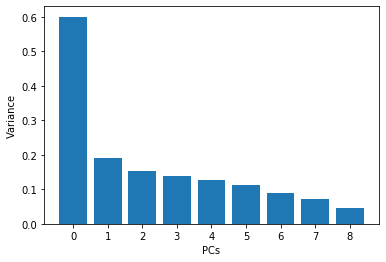

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.417188,-0.050039,1.070449,0.367263,0.252354,-0.306932,0.040668,-0.343497,-0.138140
1,-0.785920,-0.234332,0.695176,0.280200,-0.421866,-0.680468,0.102177,-0.098553,-0.143801
2,-0.785549,-0.239992,0.688067,0.272320,-0.427322,-0.684838,0.048329,-0.127015,-0.148741
3,0.823895,0.383271,0.227477,-0.056261,-0.899070,0.144254,0.053271,-0.261712,-0.191517
4,0.815259,0.381089,0.109621,0.154952,-0.707487,-0.124677,0.034540,-0.267904,-0.174695
...,...,...,...,...,...,...,...,...,...
121948,-0.933007,-0.503036,-0.355730,-0.561243,0.048089,0.106222,0.165699,-0.039562,0.078595
121949,-0.918358,-0.512394,-0.530467,-0.404890,0.113300,0.098016,0.138918,-0.056696,0.070207
121950,-0.903399,-0.521553,-0.705617,-0.248900,0.178361,0.089192,0.109212,-0.075197,0.061021
121951,-0.910181,-0.522549,-0.825955,-0.039862,0.369047,-0.183452,0.072928,-0.089586,0.073056


In [28]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,8,target
0,-0.417188,-0.050039,1.070449,0.367263,0.252354,-0.306932,0.040668,-0.343497,-0.138140,0
1,-0.785920,-0.234332,0.695176,0.280200,-0.421866,-0.680468,0.102177,-0.098553,-0.143801,0
2,-0.785549,-0.239992,0.688067,0.272320,-0.427322,-0.684838,0.048329,-0.127015,-0.148741,1
3,0.823895,0.383271,0.227477,-0.056261,-0.899070,0.144254,0.053271,-0.261712,-0.191517,0
4,0.815259,0.381089,0.109621,0.154952,-0.707487,-0.124677,0.034540,-0.267904,-0.174695,0
...,...,...,...,...,...,...,...,...,...,...
121948,-0.933007,-0.503036,-0.355730,-0.561243,0.048089,0.106222,0.165699,-0.039562,0.078595,1
121949,-0.918358,-0.512394,-0.530467,-0.404890,0.113300,0.098016,0.138918,-0.056696,0.070207,1
121950,-0.903399,-0.521553,-0.705617,-0.248900,0.178361,0.089192,0.109212,-0.075197,0.061021,1
121951,-0.910181,-0.522549,-0.825955,-0.039862,0.369047,-0.183452,0.072928,-0.089586,0.073056,1


In [29]:
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,9.926214e-15,9.700969e-17,3.506754e-16,-4.818922e-16,-4.955054e-16,2.863483e-16,-3.894197e-16,-1.804634e-15,-0.128177
1,9.926214e-15,1.000000e+00,1.438562e-15,-7.874617e-16,2.959180e-16,-2.367001e-17,-2.994489e-15,6.983480e-15,4.673338e-15,-0.340825
2,9.700969e-17,1.438562e-15,1.000000e+00,9.584480e-16,1.180627e-15,1.782651e-15,1.215161e-15,-2.441416e-15,-2.129551e-15,-0.185881
3,3.506754e-16,-7.874617e-16,9.584480e-16,1.000000e+00,1.414680e-16,-6.254165e-16,2.295446e-15,-1.986565e-15,-3.060378e-16,-0.130291
4,-4.818922e-16,2.959180e-16,1.180627e-15,1.414680e-16,1.000000e+00,-3.524309e-16,2.282444e-15,-2.193533e-15,-1.639362e-15,-0.185874
5,-4.955054e-16,-2.367001e-17,1.782651e-15,-6.254165e-16,-3.524309e-16,1.000000e+00,6.416193e-16,-2.584705e-15,-7.939342e-16,-0.142474
6,2.863483e-16,-2.994489e-15,1.215161e-15,2.295446e-15,2.282444e-15,6.416193e-16,1.000000e+00,1.397474e-15,8.399272e-16,-0.370902
7,-3.894197e-16,6.983480e-15,-2.441416e-15,-1.986565e-15,-2.193533e-15,-2.584705e-15,1.397474e-15,1.000000e+00,1.043498e-16,0.008076
8,-1.804634e-15,4.673338e-15,-2.129551e-15,-3.060378e-16,-1.639362e-15,-7.939342e-16,8.399272e-16,1.043498e-16,1.000000e+00,0.102242
target,-1.281767e-01,-3.408246e-01,-1.858806e-01,-1.302909e-01,-1.858739e-01,-1.424739e-01,-3.709018e-01,8.076276e-03,1.022422e-01,1.000000


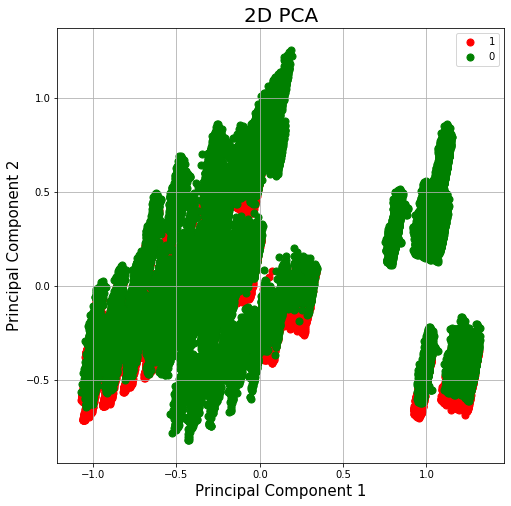

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,2,0,0,0,3,2,8,1,1,23,7,3,1,31,32,7,7,0
1,2,4,0,0,3,2,8,0,0,23,7,3,0,29,32,6,7,0
2,2,4,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
3,0,2,3,0,0,4,16,18,2,1,1,70,1,11,32,5,7,0
4,0,2,3,1,1,4,16,18,2,1,1,70,1,10,32,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121948,2,4,4,1,1,2,8,0,0,27,11,3251361,10026,22,26,5,6,1
121949,2,4,4,2,1,2,8,0,0,27,11,3251361,10026,17,26,4,6,1
121950,2,4,4,3,1,2,8,0,0,27,11,3251361,10026,11,26,3,6,1
121951,2,4,4,4,2,2,8,0,0,27,11,3251361,10026,4,26,2,6,1


In [32]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [33]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [42]:
seed = 7
np.random.seed(seed)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(principal_df, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [65]:
model = Sequential()

In [66]:
n_cols = principal_df.shape[1]
n_cols

9

In [67]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [69]:
model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Train on 66342 samples, validate on 16586 samples
Epoch 1/30
66342/66342 [==============================] - 7s 113us/step - loss: 0.2045 - accuracy: 0.6542 - val_loss: 0.1633 - val_accuracy: 0.7878
Epoch 2/30
66342/66342 [==============================] - 5s 82us/step - loss: 0.1446 - accuracy: 0.8142 - val_loss: 0.1329 - val_accuracy: 0.8244
Epoch 3/30
66342/66342 [==============================] - 5s 79us/step - loss: 0.1285 - accuracy: 0.8261 - val_loss: 0.1249 - val_accuracy: 0.8347
Epoch 4/30
66342/66342 [==============================] - 6s 87us/step - loss: 0.1223 - accuracy: 0.8329 - val_loss: 0.1197 - val_accuracy: 0.8404
Epoch 5/30
66342/66342 [==============================] - 5s 81us/step - loss: 0.1178 - accuracy: 0.8395 - val_loss: 0.1155 - val_accuracy: 0.8446
Epoch 6/30
66342/66342 [==============================] - 6s 98us/step - loss: 0.1140 - accuracy: 0.8440 - val_loss: 0.1121 - val_accuracy: 0.8486
Epoch 7/30
66342/66342 [==============================] - 5s 79us/s

In [80]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [82]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.54%


In [83]:
dff = pd.read_csv('wat-r1-pkt.csv',nrows=500)

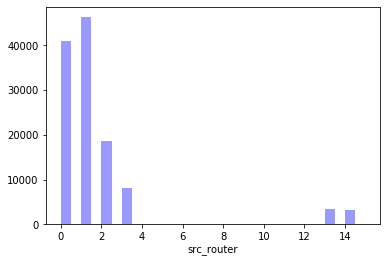

In [84]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

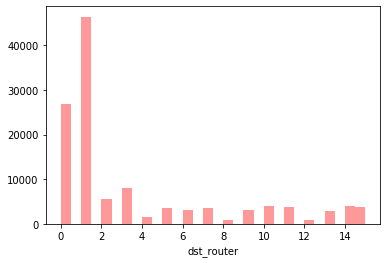

In [85]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

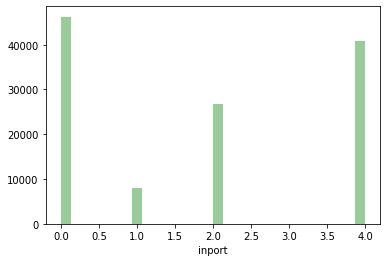

In [86]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

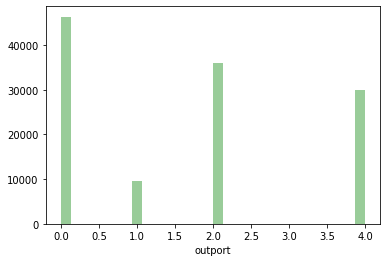

In [87]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

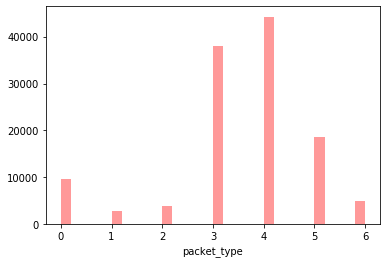

In [88]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')